Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Understand the Dataset

In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Check Missing Values

In [6]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


**Data Preprocessing**

1. Encode Categorical Variables

In [7]:
df['Fuel_Type'] = df['Fuel_Type'].map({
    'Petrol': 0,
    'Diesel': 1,
    'CNG': 2
})

df['Selling_type'] = df['Selling_type'].map({
    'Dealer': 0,
    'Individual': 1
})

df['Transmission'] = df['Transmission'].map({
    'Manual': 0,
    'Automatic': 1
})

Drop Irrelevant Column

In [8]:
df.drop('Car_Name', axis=1, inplace=True)

Feature Selection

In [9]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train the Model (Linear Regression)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [12]:
y_pred = model.predict(X_test)

Model Evaluation

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8466902419662656
Mean Absolute Error: 1.2219323621752276
Mean Squared Error: 3.5315798889713346


Compare Actual vs Predicted Prices

In [14]:
comparison = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

comparison.head()

,Actual Price,Predicted Price
177,0.35,2.965630
289,10.11,8.300858
228,4.95,6.057828
198,0.15,-1.467368
60,6.95,9.257057


Visualization

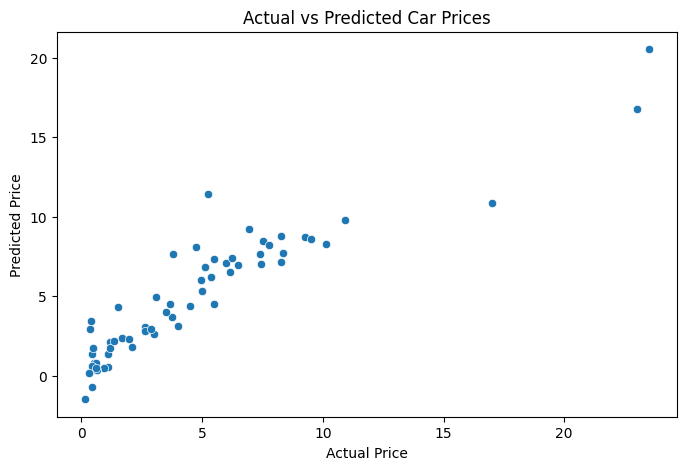

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

Predict Price of a New Car

In [17]:
new_car = pd.DataFrame({
    'Year': [2017],
    'Present_Price': [7.5],
    'Driven_kms': [30000],
    'Fuel_Type': [0],        # Petrol
    'Selling_type': [0],     # Dealer
    'Transmission': [0],     # Manual
    'Owner': [0]
})

predicted_price = model.predict(new_car)
print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 5.875932232606033
